# Chapter 5     
# Introduction to Perception and Visualization

In this chapter, we will investigate techniques to maximize the information a viewer perceives from data visualizations. Creating a visualization that optimizes human perception can highlight important insights. When faced with trying to understand complex data sets the limits of human perception become a significant factor. Applying the results of the considerable research on human perceptions for data visualization can help the process considerably. 
   
This chapter explores using plot aesthetics to improve the perception of complex relationships. We take a very broad view of the term 'aesthetic' here. By plot aesthetics, we mean properties of a visualization that highlight aspects of the data relationships. Additionally, aesthetics are used to project additional dimensions of complex data onto the 2-dimensional plot surface.  In summary, applying aesthetics with a bit of cleverness can lead to interesting insights about a data set.    

In each section of this chapter, we will explore one aspect of using Python visualization tools to effectively understand the relationships in complex data sets. These sections are ordered by how good human perception is for those aesthetics: 

1. **Easy to perceive plot aesthetics:** We will start with generally easy to perceive aesthetics. These aesthetics are the most powerful at enhancing a viewer's perception. If possible, these aesthetics should be preferred when creating visualizations.    
 
2. **Aesthetics with moderate perceptive power:** There are certain aesthetics, that are effective, but only when used within their limits.       

3. **Aesthetics with limited perceptive power:** We will review some commonly used aesthetics that have limited perception power. Such aesthetics must be used sparingly.  Nonetheless, these aesthetics can still be useful in highlighting certain relationships in complex data sets.   

There are many possible plot properties or aesthetics one can use for visualization. This chapter is by no means comprehensive. Specific examples of aesthetics discussed here, the applicable data types, and the relative perceptive power are summarized in the table below:

| Property or Aesthetic |Perception| Data Types |
|:---------|:-----------|:------------|
|Aspect ratio | Good | Numeric |
|Regression lines | Good | Numeric plus categorical |
|Marker position | Good | Numeric |
|Bar length | Good | Counts, numeric |
|Sequential color palette | Moderate | Numeric, ordered categorical |
|Marker size | Moderate | Numeric, ordered categorical |
|Line types | Limited | Categorical |
|Qualitative color palette | Limited | Categorical|
| Marker shape | Limited | Categorical |
| Area | Limited | Numeric or categorical |
| Angle | Limited | Numeric |


> **Limits of perception** Don't over do it! All aesthetics have limitations. Using too many colors, shapes, line styles, etc., can be confusing. Poor practice will obfuscate rather than enlighten. 


# Easy to Perceive Aesthetics

In this section, we will explore some plot aesthetics and attributes which maximize human perception. By employing these aesthetics or plot attributes you can create visualizations that are more likely to highlight key relationships in your data set.  

For the running example in this chapter, we will work with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to understand the relationship between the price and fuel economy of a car and its characteristics.


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

auto_price = pd.read_csv('../data//AutoPricesClean.csv')


## Aspect Ratio and Banking

Changing the **aspect ratio** has a significant influence on how a viewer perceives a chart. The correct aspect ratio can help highlight important relationships in complex data sets. Conversely, poorly chosen or exaggerated aspect ratios can greatly distort human perception of the displayed relationship.  

We express aspect ratio as follows:     

$$aspect\ ratio = \frac{width}{height}\ : 1$$
The aspect ratio can be expressed either way. A tall narrow plot might have an aspect ratio of 1:4. Whereas, a wide low plot might have an aspect ratio of 4:1.   

The key to understanding how the aspect ratio affects perception is the **banking angle** [@Cleveland_1993]. The banking angle is the average absolute angle of the curve displayed in a graph. Cleveland has shown that finding an aspect ratio that gives a banking angle of approximately $45^{\circ}$ optimizes the perception of changes in slope. 

Let's look at an example of how aspect ratio and banking angle can change the perception of a plot. The annual count of sunspots time series [@WDC-SILSO] is one of the longest scientific time series in existence. The code in the cell below contains the sunspot count from 1700 to 1980. 


In [8]:
sunspots_data = sm.datasets.sunspots.load_pandas().data
sunspots_data.head()


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


The two columns are the year and the number of sunspots. 

We will make the first plot of this time series with an aspect ratio of about 1:1. The code below makes a **time series plot** with the date on the horizontal axis and the number of sunspots in each year on the vertical axis. Since these observations are ordered in time, a line plot is used.  


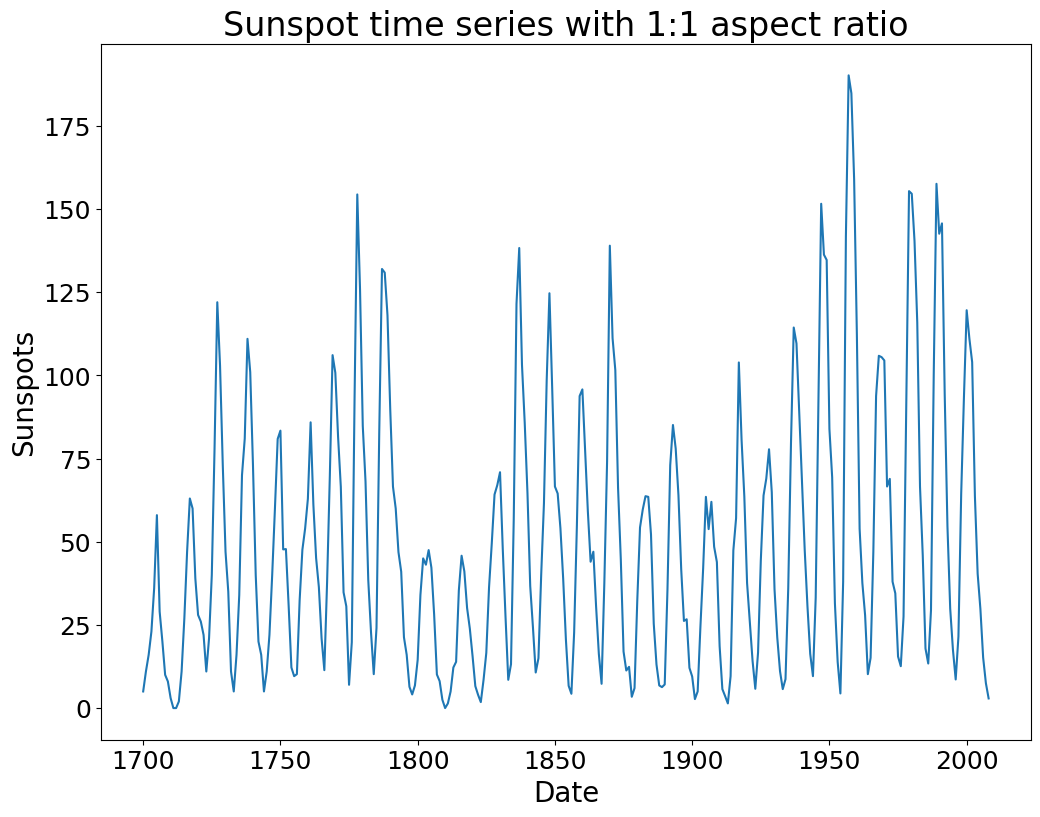

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.subplots_adjust(bottom=0.3)
ax = sns.lineplot(x='YEAR', y='SUNACTIVITY', data=sunspots_data, errorbar=None, ax=ax)
_=ax.set_title('Sunspot time series with 1:1 aspect ratio', fontsize=24)
_=ax.set_xlabel('Date', fontsize=20)
_=ax.set_ylabel('Sunspots', fontsize=20)
_=ax.tick_params(labelsize=18)
plt.show()

There are two points to notice about the time series displayed here:
1. The number of sunspots is periodic in time. This is the well-known **sunspot cycle**, with a period of approximately 11 years.  
2. Given this aspect ratio, each cycle appears to be symmetric. But, notice that the average slope or banking angle in this plot is high, much greater than $45^{\circ}$. 

What happens if we change the aspect ratio to about 15:1 to improve the banking angle? The code in the cell below creates just such a plot.


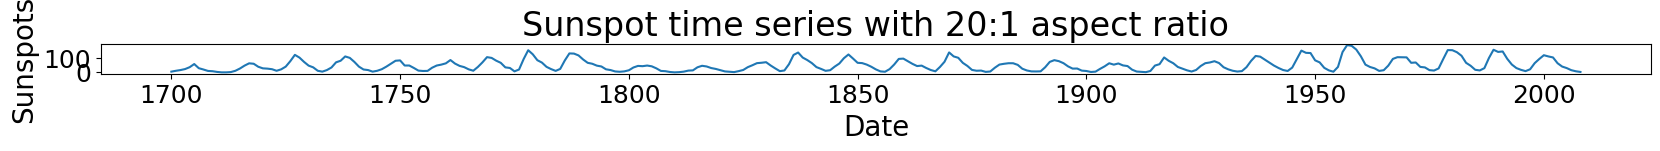

In [12]:
fig, ax = plt.subplots(figsize=(20, 1))
fig.subplots_adjust(bottom=0.4,top=0.7)
ax = sns.lineplot(x='YEAR', y='SUNACTIVITY', data=sunspots_data, errorbar=None, ax=ax)
_=ax.set_title('Sunspot time series with 20:1 aspect ratio', fontsize=24)
_=ax.set_xlabel('Date', fontsize=20)
_=ax.set_ylabel('Sunspots', fontsize=20)
_=ax.tick_params(labelsize=18)
plt.show()

You can see that the banking angle in the plot is now considerably lower than before. The banking angle for most of each cycle is much closer to $45^{\circ}$. The lower banking angle brings a new, and important, property of the time series to light. The rise of the cycle is generally much faster than the drop in activity. You can see this in the asymmetry of most of the cycles.


> **Exercise 5-1:** To better understand the effects of changing aspect ratio and therefore banking angle, try the following. Create 3 scatter plots using the Seaborn [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) function with the following properties: 
> 1. Place price on the vertical axis and city MPG on the horizontal axis.    
> 2. Use fuel type for the `hue` argument. Include a second-order polynomial curve.   
> 3. The aspect ratio of these three plots should be a) 1:1, b) 1:2, c) 4:1.   
> 4. For `lmplot` you will need to set an appropriate `height` and `aspect` argument to make each of these plots.    
> Reference to the Seaborn documentation will be helpful. 

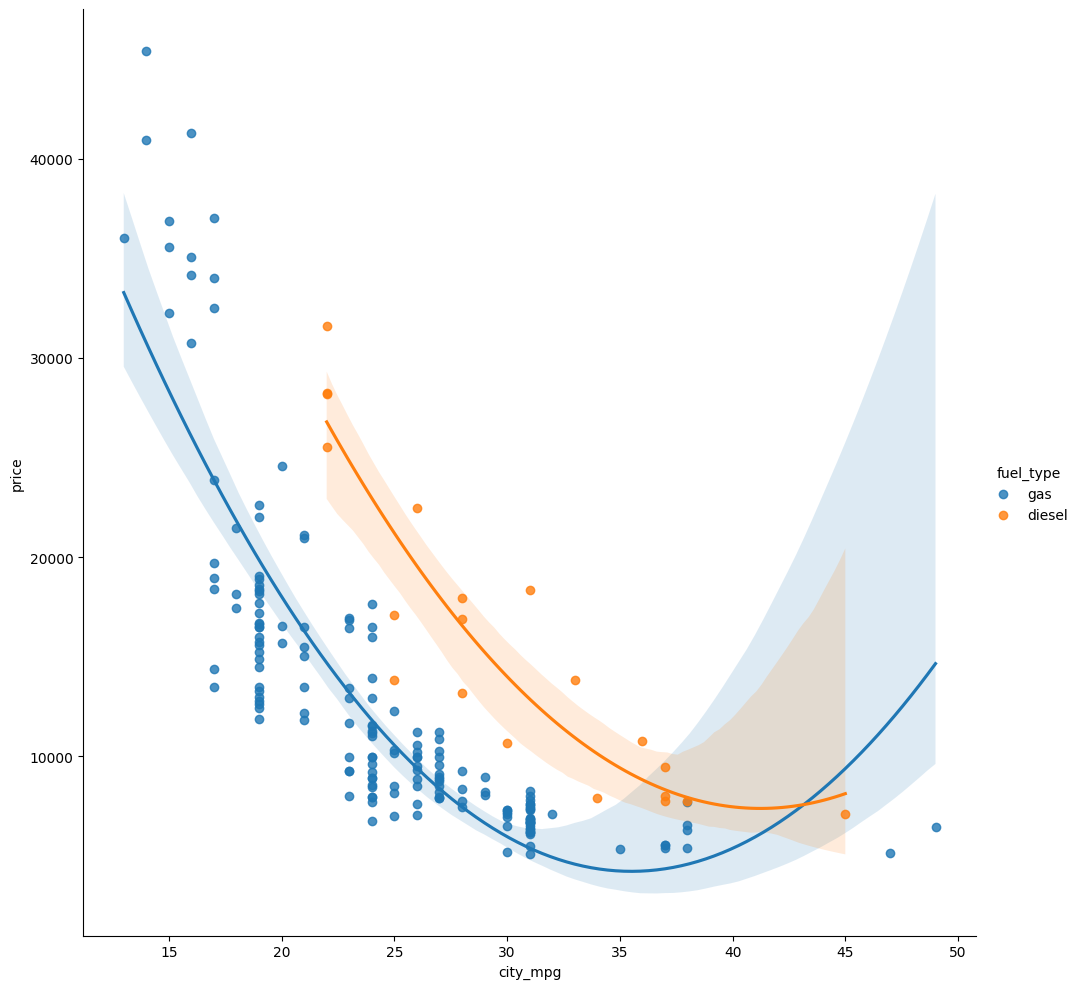

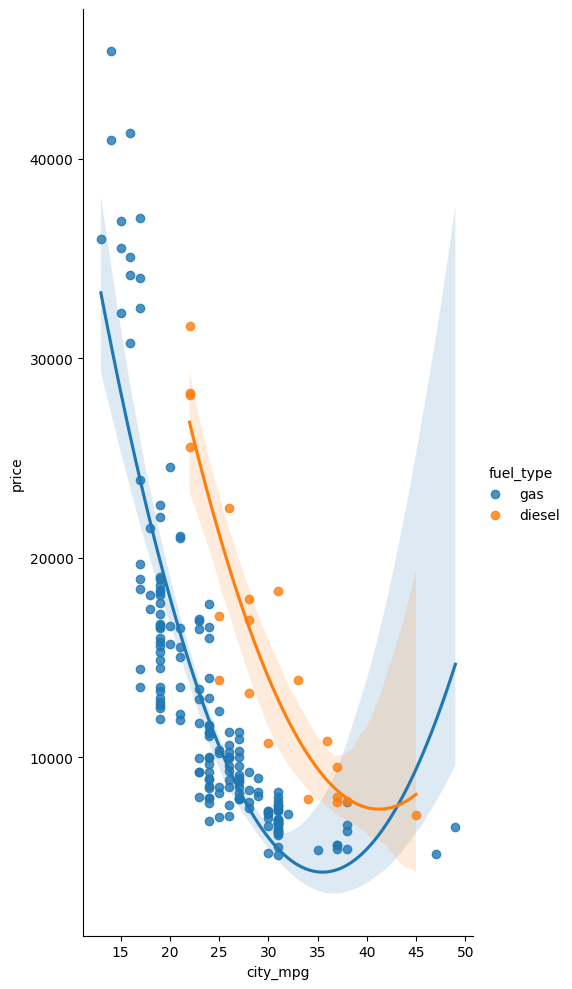

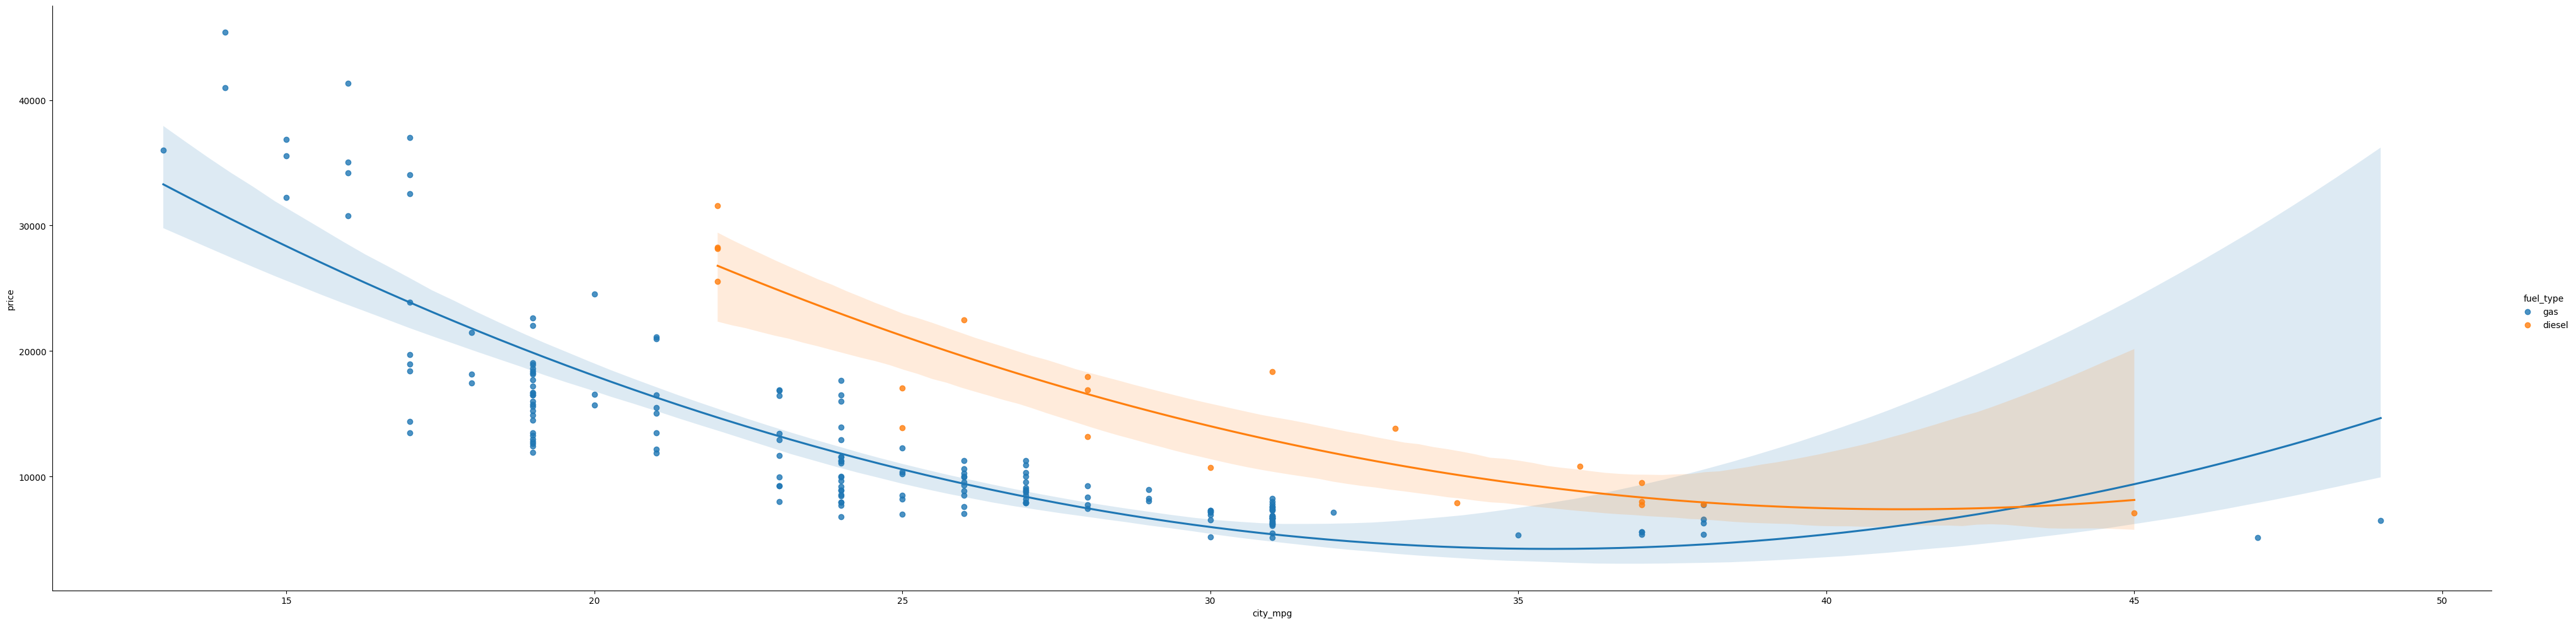

In [20]:
## Put your code below
# auto_price.head(5)


sns.lmplot(data=auto_price,x='city_mpg',y='price', hue='fuel_type', height = 10, aspect = 1, order = 2)
sns.lmplot(data=auto_price,x='city_mpg',y='price', hue='fuel_type', height = 10, aspect = .5, order = 2)
sns.lmplot(data=auto_price,x='city_mpg',y='price', hue='fuel_type', height = 10, aspect = 4, order = 2)

> Notice that the relationship between the price and city MPG does not follow a straight line for either fuel type for the 1:1 aspect ratio. How does increasing or decreasing the aspect ratio change the banking angle and therefore your perception of these relationships?    

> **Answer:** 
A larger aspect ratio (meaning wider than tall) implies a very subtle effect of price on MPG, whereas the sharper aspect ratios <1 seem to suggest that there is exactly one small sweet-spot of about 35mpg for the cheapest cars. The wider chart gives the impression that there are slight changes to either side of 35mpg while the narrow one shows steep price increases as soon as we move away from 35 mpg.

> **Exercise 5-2:** Poor human perception of angle was mentioned in the introduction to this chapter. To demonstrate this create a plot with three lines using the following x,y end points using the same set of axes: a) (0,0) and (5,5), b) (0,0.5) and (5,6), and c) (0,1) and (5,7). Make sure the aspect ratio of the plots are approximately 1:1, by setting the 'figsize' argument for the Matplotlib 'subplots' function. 

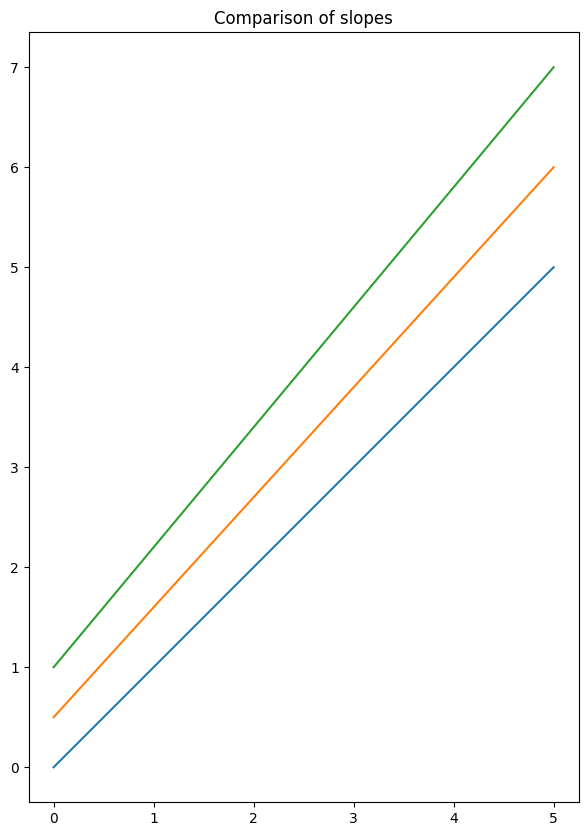

In [24]:
## Put your code below

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Comparison of slopes")
ax.set_aspect(1)


x, y = [0, 5, 0, 5, 0, 5], [0, 5, 0.5, 6, 1, 7]

for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2])

plt.show()

> Notice these plots all have the similar slopes. But, how well can you perceive these difference in slopes? In other words, can you preceive the small differences in slope between the three lines?  

> **Answer:** 
I can tell they're not parallel, but I don't immediately see that the first line has slope 1 and the 3rd line has slope 1.2

## Marker Position and Scatter Plots

Human perception of even small differences in position is quite acute. This acute perception makes scatter plots and other plots using marker position quite effective. As a result, scatter plots are one of the most widely used, useful, and powerful plot types, despite the apparent simplicity. 

Scatter plots show the relationship between two variables in the form of marker positions on the plot. In simple terms, the values along a horizontal axis are plotted against a vertical axis. 

As a reference point for a running example in this chapter we will start with a basic scatter plot. The code below creates a plot of city MPG on the horizontal axis and vehicle curb weight on the vertical axis. 

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='city_mpg', y='curb_weight', data=auto_price)
_=ax.set_title('Scatter plot of Vehicle Weight vs MPG', fontsize=18) # Give the plot a main title
_=ax.set_xlabel('City MPG', fontsize=16) # Set text for the x axis
_=ax.set_ylabel('Vehicle Weight', fontsize=16) # Set text for y axis
plt.show()

In this plot, you can see very small differences in the vehicle weight for each value of city MPG. These values are quite small in some cases, yet you can easily see the differences. Notice that city MPG is quantized in 1 MPG units.     

> **Exercise: 5-3** You can demonstrate the perceptual power of position by creating a plot following these steps. 
> 1. Create a Numpy array with a series of x,y pairs of points for the plot, running from 0.0 to 4.0 by increments of 1.0. You can create the series using the [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function.    
> 2. Next, create an array of offset values starting at 0.00001 and ending at 0.1, by powers of 10. You can create this array using the [numpy.power](https://numpy.org/doc/stable/reference/generated/numpy.power.html) function with an array of powers of 10 as the argument. Create a new array by adding the array of offsets to the array you created in step 1.  
> 3. Make one scatter plot with [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for both the first array and the array with the offsets. Set the point size small with the `s=5` argument. The x and y values are the same for both sets of points (one array used for both arguments), only the offsets are different. Make sure the size of the plot is large enough to clearly see as many differences as possible. 
> Execute your code. 

[1.0000e-05 1.0001e+00 2.0010e+00 3.0100e+00 4.1000e+00]


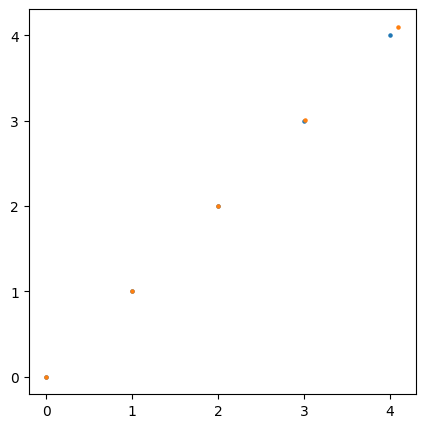

In [157]:
## Put your code below   

fig, ax = plt.subplots(figsize = (5,5))
x, y = np.arange(0,5), np.arange(0,5)
offset = np.power(10.0, np.arange(-5,0, 1))

x_off = x + offset
y_off = y + offset

print(x_off)

plt.scatter(x,y, s = 5)
plt.scatter(x_off, y_off, s = 5)
plt.show()

> Examine your plot and answer the following questions:    
> 1. Which of these differences can you see? 
> 2. What does this tell you about perception of small differences in position on a plot? 

> **Answers:**    
> 1. Even with the scaled up plot, you can only see the difference when the offset exceeds 1e-2, so only the difference in the last two points.
> 2. We can perceive a difference of 0.01 in a plot with an area of 4x4. This tells us that small enough differences are indistinguishable in small enough plots, so the scale of the axes are important in understanding the data displayed.

## Bar Length and Ordered Bar plots

Length is another plot aesthetic or property for which human perception is quite sensitive. Most people can discern small differences in length. Thus, the perception of relationships in bar plots can be quite good.  

Bar plots are used to display the counts of unique values of a categorical variable. The length of the bar represents the count for each unique category of the variable. Small differences in the counts, resulting in small differences in the bar lengths are quite perceptible.    

The code in the cell below uses the Seaborn [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of the number of cars by make.  

/var/folders/d0/01t2y6qs1dn8z3g5krcgkc_00000gn/T/ipykernel_31253/2084498640.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)


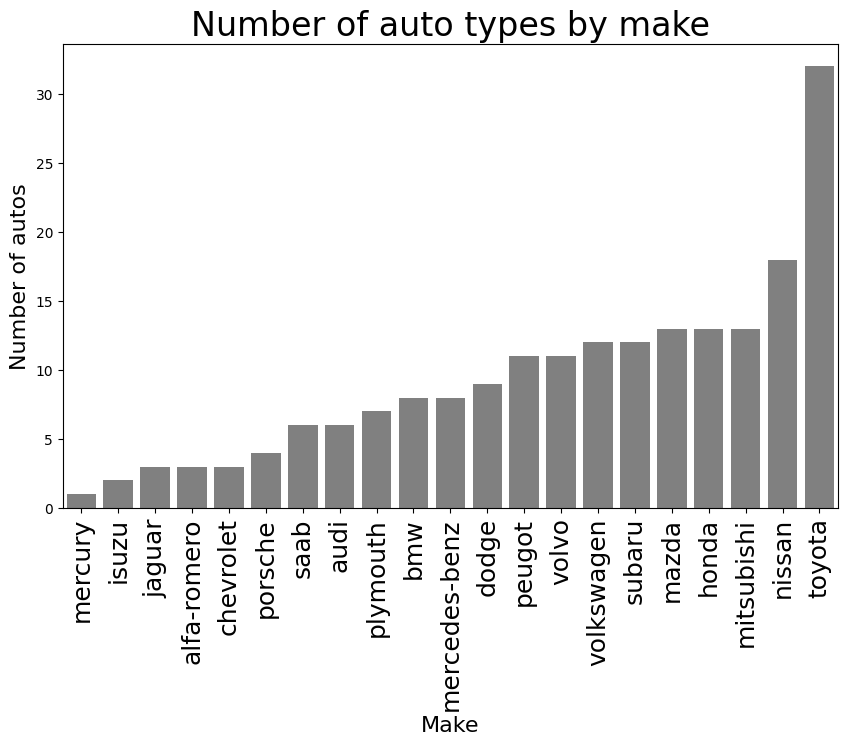

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.subplots_adjust(bottom=0.3)
ax = sns.countplot(x='make', data=auto_price, color='gray', ax=ax)
# , order = auto_price['make'].value_counts(ascending = True).index)
_=ax.set_title('Number of auto types by make', fontsize=24) # Give the plot a main title
_=ax.set_xlabel('Make', fontsize=16) # Set text for the x axis
_=ax.set_ylabel('Number of autos', fontsize=16)# Set text for y axis
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
plt.show()


This chart is hard to interpret since the bars are not ordered by height. You cannot tell which makes have identical counts or which makes might have slightly higher or lower counts. Even though the human perception of differences in length is generally quite good, if the lengths being judged are separated by other bars, determining small differences in length is difficult. 

What is the solution? The bars in the plot must be ordered by length. Placing the bars in increasing or decreasing order greatly enhances perception. 

The code below orders the counts using **chained** Pandas methods:  
1. The [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method computes the course. 
2. The [`reset_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) method fixes the index of the Pandas series in count order.

The Seaborn [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function is similar to `countplot`, but works on numerical counts. Since the series object is ordered `barplot` creates an ordered bar plot. 


Index(['make', 'count'], dtype='object')


/var/folders/d0/01t2y6qs1dn8z3g5krcgkc_00000gn/T/ipykernel_31253/506279619.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)


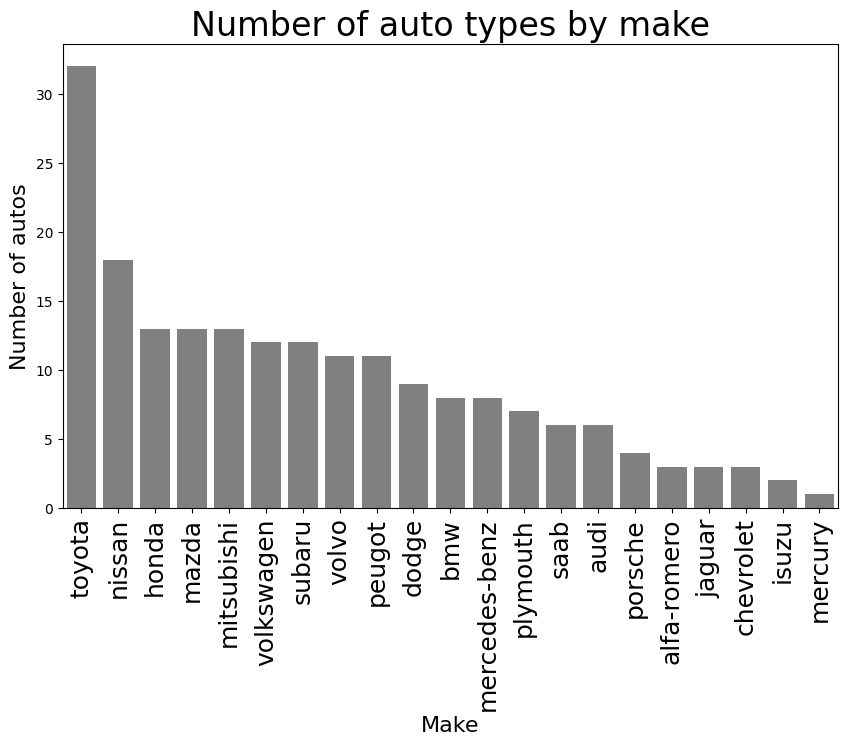

In [50]:


counts = auto_price['make'].value_counts().reset_index() 
print(counts.columns)
# print(counts)


fig, ax = plt.subplots(figsize=(10, 8))
fig.subplots_adjust(bottom=0.3)
ax = sns.barplot(x='make', y='count', data=counts, color='gray', ax=ax) 
_=ax.set_title('Number of auto types by make', fontsize=24) # Give the plot a main title
_=ax.set_xlabel('Make', fontsize=16) # Set text for the x axis
_=ax.set_ylabel('Number of autos', fontsize=16)# Set text for y axis
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
plt.show()

In [52]:
print(counts.columns)


Index(['make', 'count'], dtype='object')


Now the bar plot is ordered. You can easily see the relationship of the number of auto models by make.  

It is worth considering commonly used alternatives to a simple bar plot. These alternatives have **poor perceptual qualities** and **should be avoided**. 
- **Stacked bar charts:** When multiple categories are stacked into a single bar, the viewer often has difficulty determining the relative lengths of the sub-segments in the bars. Except in special cases, the alignment of the sub-segments will be somewhat random and hard to compare. The perceptual problem is similar to the un-ordered bar chart.      
- **Pie charts:** Pie charts use area or angle, rather than length to show relative values. Human perception of both area and angle is quite poor in general. Interpreting pie charts depends on perception of either area, angle, or both. Further, when there are more than a few categories the small differences in the area of the slices become completely unnoticeable.    

Is there a good alternative to stacked bar charts and pie charts? Yes. In the previous chapter, we created a bar plot of one variable grouped by the `hue` argument variable. Such a plot is much easier to interpret than a stacked bar chart in general.   

> **Exercise 5-4:** To demonstrate the interpretation problems with pie charts, create a pie chart. As of this writing, there is no pie chart in Seaborn. Therefore you can use the pie chart method in Pandas, [`dataframe.plot.pie`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html). 

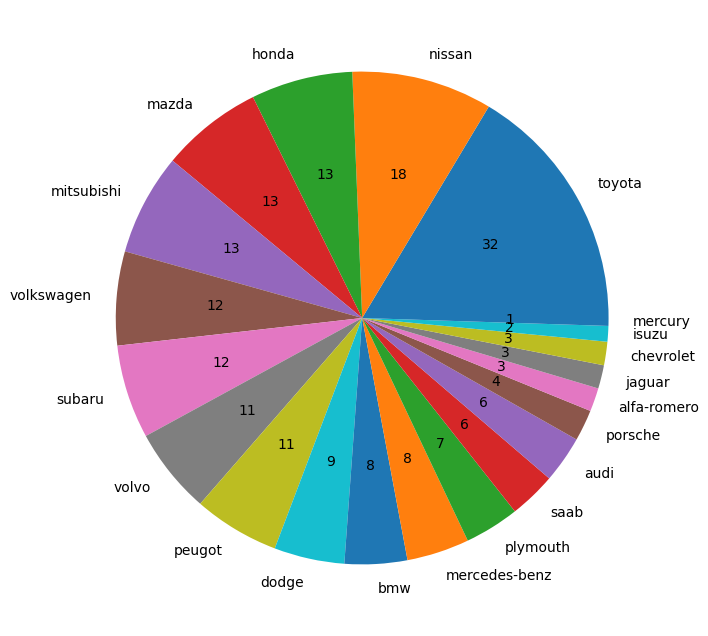

In [84]:
counts = auto_price['make'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

ax = counts.plot.pie(autopct=lambda p: f'{int(round(p * counts.sum() / 100))}', ylabel='')

plt.show()

> Is it possible to interpret the differences in the numbers of models for each manufacturer and why?    

> **Answer:** It's difficult to see because there are so many thin slices of the pie, and way too many colors. However we can "cheat" the autopct param and add them back in. 

##  Aesthetics with Moderate Perceptive Power

Many plot aesthetics are effective if used correctly, and within their limitations. In this section, we address a few widely used examples. 

### Sequential and Divergent Color Palettes

Use of **color** as an aesthetic in visualization is a complicated subject. While color is often used, it is also often abused and leads to misleading or uninterpretable results. 

To structure our discussion, we will define two particular cases for the use of color in visualization:     
- A **qualitative palette** is a palette of individual colors used to display categorical values. We will address this case later.     
- **Sequential palettes** and **divergent palettes** are a sequence of colors used to display a quantitative variable or ordered categorical variable. A sequential palette contains a color sequence of changing hue, which corresponds to a sequence of changing values of a quantitative variable, or ordered categorical variable. A divergent palette has two sequences of hues with a gap in the center. Divergent palettes are useful for quantitative variables with positive and negative values.    

> **Limits of color:** Regardless of the approach there are some significant limitations:
> 1. A significant number of people are color blind. Red-green color blindness is most common, particularly in men. Keep this fact in mind when selecting a color palette. 
> 2. Even the best sequential or divergent palettes show only the relative value of numeric variables. Perception of exact numeric values is difficult, except in special cases.  

#### Example with sequential color palette

When doing data visualization in Python you have the choice of several sets of well-designed sequential and divergent color palettes. [There is an extensive set of palette choices in Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Matplotlib contains [another set of high-quality palettes](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). These Matplotlib options, including **perceptually uniform palettes**, are expertly designed to optimize human perception. 

The code in the cell below creates a scatter plot with city MPG on the horizontal axis and vehicle curb weight on the vertical axis. The vehicle price shown uses the sequential `magma` palette from Matplotlib. Magma uses 'hotter' colors to show larger values of a quantitative variable. 

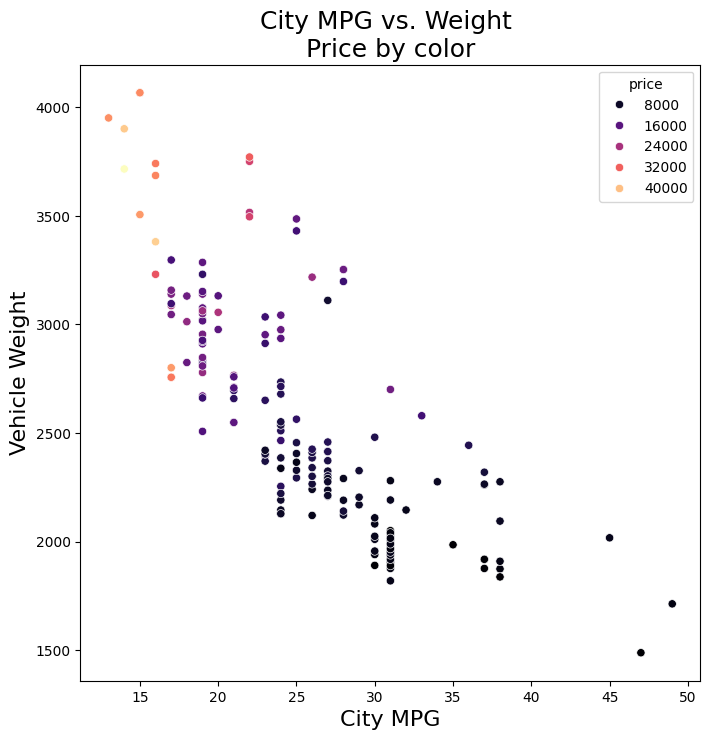

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='city_mpg', y='curb_weight', data=auto_price, 
                     hue = 'price', palette = 'magma', ax=ax)
_=ax.set_title('City MPG vs. Weight \nPrice by color', fontsize=18)
_=ax.set_xlabel('City MPG', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 
plt.show()

Examine the plot, noticing the general trend from the lower right to the upper left. The lowest weight, and highest mileage, autos generally have the lowest prices. The highest-weight, lowest mileage, autos generally have the highest prices. Within these general trends, some deviation is noticeable, but the general trend is clear from the color progression of the palette. 

While it is hard to draw quantitative conclusions from color progressions, they can help show general trends. This can be done effectively with the correct choice of palette. The best choice of palette to highlight a relationship can take some experimentation.   


#### Sequential Color palettes and Heat Maps

A **heat map** or **raster plot** allows you to visualize data that can be arranged on a regular grid or lattice. The heat map uses a **sequential color map** to show the values, or heat, on the grid. Data arranged on a lattice is fairly common in many areas: spatial analysis, image analysis, genetic marker mapping, and correlation analysis. 

Python's packages have several useful plotting methods to display lattice data, or data arranged in an N row X M column numeric array. In this case, we will use the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) method from Seaborn. 

In this example, we will create a heatmap of the number of airline passengers arranged by year horizontally and months vertically. These data are in the Seaborn example data sets. 


In [98]:
airlines = sns.load_dataset("flights")
airlines.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


The data frame is organized in tabular form, not a lattice. The Pandas [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method is used to organize these data into the required lattice form. With the data correctly organized, the Seaborn `heatmap` function creates the display.



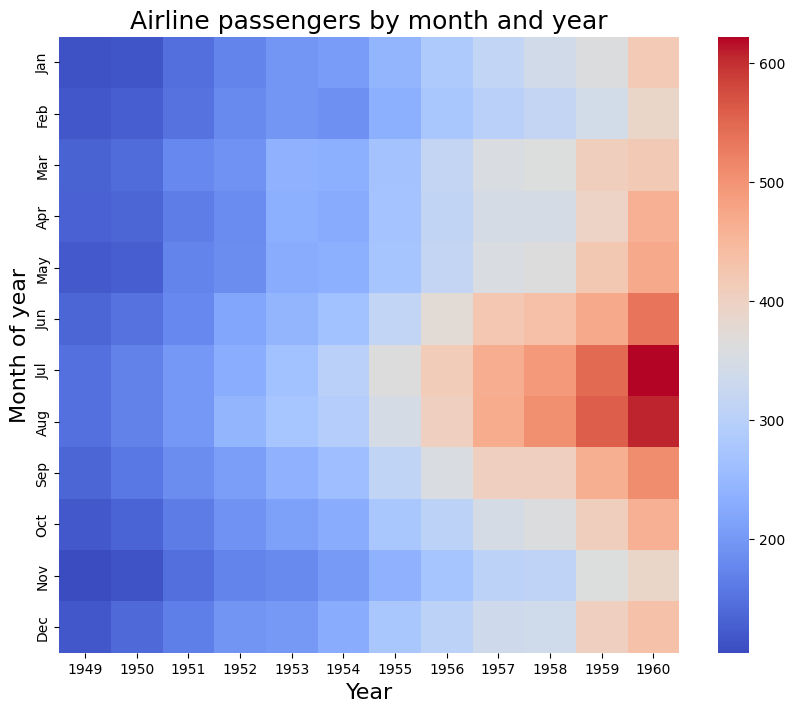

In [101]:
airline2 = airlines.pivot(index='month', columns="year", values='passengers')
# print(airline2)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(airline2, cmap='coolwarm', ax=ax)
_=ax.set_title('Airline passengers by month and year', fontsize=18)
_=ax.set_xlabel('Year', fontsize=16)
_=ax.set_ylabel('Month of year', fontsize=16) 
plt.show()


The display shows several important relationships in these data.    
- The number of airline passengers increases significantly with the year.   
- Air travel is more popular in the summer months.     

### Marker Size

Another moderately effective aesthetic useful for quantitative variables is **marker size**. As with a well chosen color palette, used properly, marker size can highlight important trends in complex data sets. But there are also limitations. The viewer can generally perceive relative differences, but not actual values.   

Several Seaborn functions, including `scatterplot`, have a `size` argument, which sets marker size by values of the variable assigned. The range of marker sizes must also be specified with the `sizes` argument. Markers which are too small cannot be seen easily. Whereas, if the markers are too large, they will overlap and obscure one another. Some experimentation is usually required for a specific application.    

An example, setting marker size to the size of the engine, is shown in the code below. 


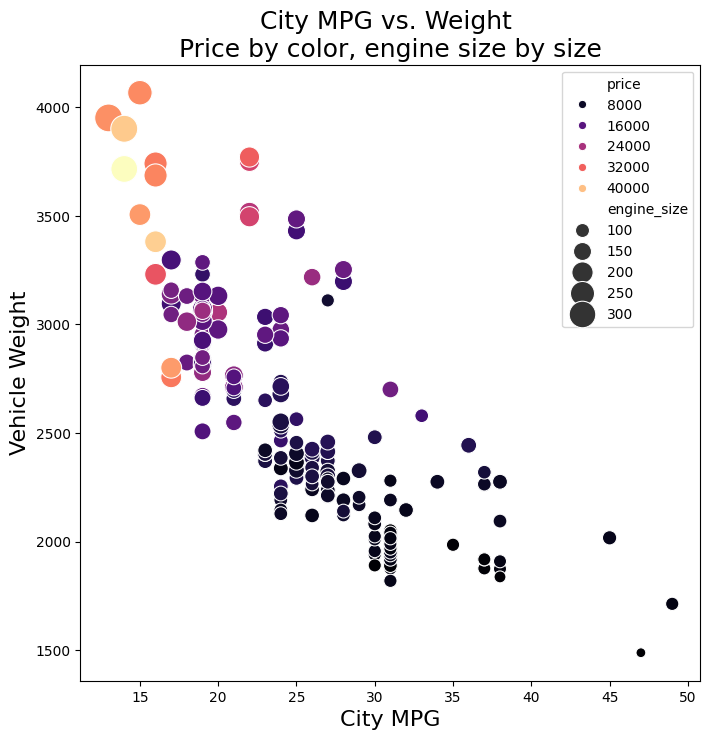

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='city_mpg', y='curb_weight', data=auto_price,
                     hue = 'price', palette = 'magma',
                     size = 'engine_size', sizes = (50.0, 400.0),
                     ax=ax)
_=ax.set_title('City MPG vs. Weight \nPrice by color, engine size by size', fontsize=18)
_=ax.set_xlabel('City MPG', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 
plt.show()


Notice that the engine size generally increases with vehicle weight. As with price, the trend is clear from the changing marker sizes. However, perception of specific numeric values of engine size is not possible. 

> **Exercise 5-5:** Consider how many dimensions of the auto data are projected onto the 2-dimensional surface of this plot. How can you best describe the relationship between all of these variables?   

> **Answer:**
> There's a correlation between all 4 variables: larger engine size generally means more expensive, heavier cars, and lower mpg. This relationship also means smaller engine = cheaper cars = lighter cars = higher mpg.

### Aesthetics with Limited Perceptive Power

We have explored some aesthetics which are easy to perceive, and therefore quite powerful, and some others with moderate perceptive power. You may be surprised to learn that some commonly used plot aesthetics are not that easy to perceive. Without care, these aesthetics do not promote perception in the way a creator might think they will.     

#### Line Plots and Line Type

We have already encountered line plots. Line plots connect discrete, ordered, data points by a line. It is common practice to use different line pattern types to differentiate data grouped by a categorical variable. While this approach can be effective, it is only useful for a limited number of lines on one graph. The use of too many similar line pattern on one plot leads to viewer confusion and poor perception of the data relationships. In summary, line pattern can be effective, but only when used sparingly.  

The code below creates a data frame using various transformations of the sunspot data.  

In [103]:
## Compute some transformed variables
sunspot_mean = sunspots_data.loc[:,'SUNACTIVITY'].mean()
y1 = [z/sunspot_mean for z in sunspots_data.loc[:,'SUNACTIVITY']]
y2 = [log(z + 0.01) for z in y1]
y3 = [1.0/(z + 0.1) for z in y1]
y4 = [sqrt(z) for z in y1]
## Construct the data frame
df = pd.DataFrame({'Date':sunspots_data.loc[:,'YEAR'],'Normalized':y1, 'Log':y2, 'Inverse':y3, 'Sqrt':y4})
## Convert the floating-point year to a Pandas datetime type
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'].astype(int),format='%Y')
df.head()


,Date,Normalized,Log,Inverse,Sqrt
0,1700-01-01,0.100498,-2.202755,4.987574,0.317015
1,1701-01-01,0.221096,-1.464921,3.114332,0.470209
2,1702-01-01,0.321594,-1.103843,2.371948,0.567093
3,1703-01-01,0.462292,-0.750158,1.778435,0.679921
4,1704-01-01,0.723587,-0.309808,1.214200,0.850639


Now, we will make a time series plot of these transformed variables using a different line type for each variable. You can find [matplotlib line styles options in the documentation](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html). The code below uses 4 line types to display the transformed variables on a time series plot.    



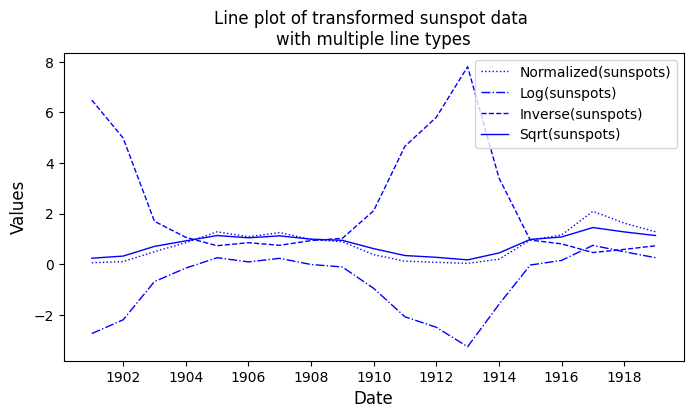

In [104]:
styles = [':','-.','--','-'] # Some line styles
fig = plt.figure(figsize=(8, 4)) # define plot area
ax = fig.gca() # define axis   
temp = df[(df['Date'] > '1900-01-01') & (df['Date'] <= '1919-12-01')]
## Iterate over the time series and line styles to plot
for col, style in zip(temp[['Normalized','Log','Inverse','Sqrt']], styles):    
    _=ax.plot(temp.Date, temp[col], linestyle = style, color = 'b', label=(col+'(sunspots)'), linewidth=1)
## Annotate the plot, including legend
_=ax.set_title('Line plot of transformed sunspot data \nwith multiple line types') 
_=ax.set_xlabel('Date', fontsize=12) # Set text for the x axis
_=ax.set_ylabel('Values', fontsize=12)# Set text for y axis    
_=ax.legend()
plt.show()


Examine the plot above and notice that with just 4 types, the lines on the plot are distinct. This is even the case for the normalized sunspots and the square root of the normalized sunspots, which run quite close together. But, it is not hard to imagine that adding too many line types to a plot will cause perception problems for the viewer. 

In principle, a combination of color and line type can be used to make lines distinct. However, this method must be used cautiously. The result can easily be *line spaghetti* which is difficult to understand, at best. The limits of perception are hit quickly.   


### Qualitative Color Palettes

Qualitative (or categorical) color palettes are often used to display data grouped by a categorical variable. If the number of categories is few and the colors chosen are distinctive, this method can be effective. However, for more than a few categories, or if the choice of color is poor, this method is not effective. The result is often a confusing array of symbols with hard-to-distinguish colors, which will confound the understanding of the viewer. 

As an example where a qualitative palette works well consider the scatter plot shown below. There are only two categories and the colors are quite distinctive. 


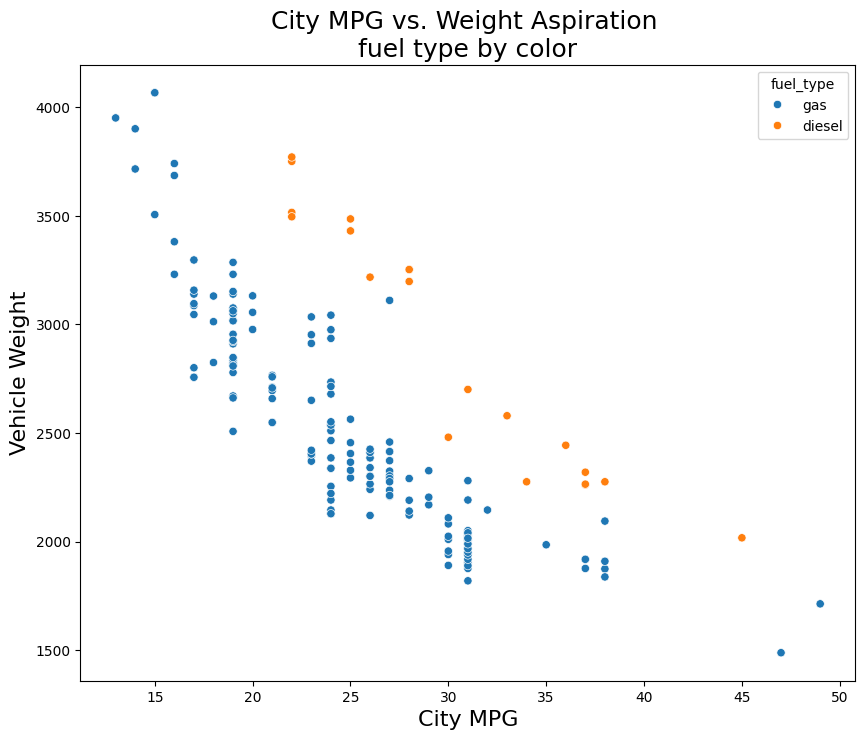

In [105]:
fig, ax = plt.subplots(figsize=(10, 8))
_=sns.scatterplot(x = 'city_mpg', y = 'curb_weight',
                  hue = 'fuel_type',
                  data=auto_price,
                  ax=ax)
_=ax.set_title('City MPG vs. Weight Aspiration \nfuel type by color', fontsize=18)
_=ax.set_xlabel('City MPG', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 
plt.show()

We can easily see the distinctive relationships for both gas and diesel-fueled cars. Using a few categorical colors from a well-chosen palette can be quite effective. 

> **Exercise 5-6:** What happens if a qualitative color palette is used with a large number of categories? To find out, create a scatter plot with city MPG on the horizontal axis and price on the vertical axis. Set the `hue` parameter to the make variable. 

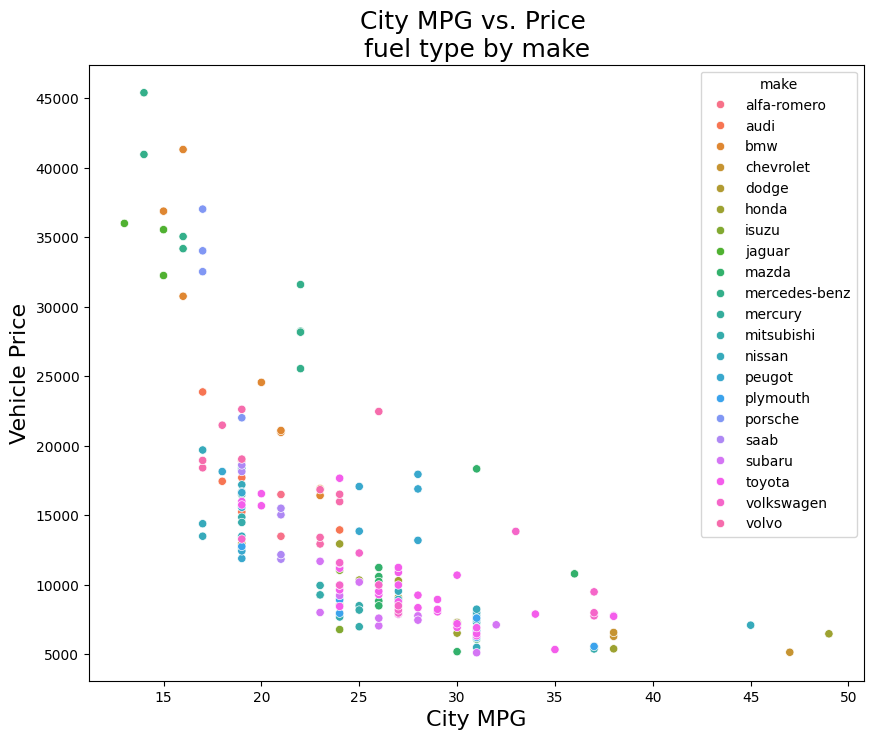

In [108]:
## Put your code below   
fig, ax = plt.subplots(figsize=(10, 8))
_=sns.scatterplot(x = 'city_mpg', y = 'price',
                  hue = 'make',
                  data=auto_price,
                  ax=ax)
_=ax.set_title('City MPG vs. Price \nfuel type by make', fontsize=18)
_=ax.set_xlabel('City MPG', fontsize=16)
_=ax.set_ylabel('Vehicle Price', fontsize=16) 
plt.show()





> Is it possible to interpret the colors by make? What does this tell you about the limitations of using a larger number of colors from a qualitative palette? 

> **Answer:** It's difficult to distinguish between the makes. For example, to my eyes, Saab, Subaru, and Toyota are all pretty much the same color, even on the legend. On the plot itself it's difficult to determine if a dot is any of the three makes.


> **Exercise 5-7:** What are a number of alternatives to the hard-to-understand plot you created in the previous exercise? The idea of ordered box plots can be applied to many data sets, including the automotive data. You will create two ordered box plots of weight and price on the vertical axis by auto make on the horizontal axis. Your code, ideally in a function, should do the following:      
> 1. Compute the median of the variable grouped by the auto make and sorted by the variable.     
> 2. Create a figure axis and plot the box plots using the `order` argument. Rotating the x-axis tick labels by 90 degrees will greatly improve readability.     
> Execute your code for both numeric variables, weight and price. 

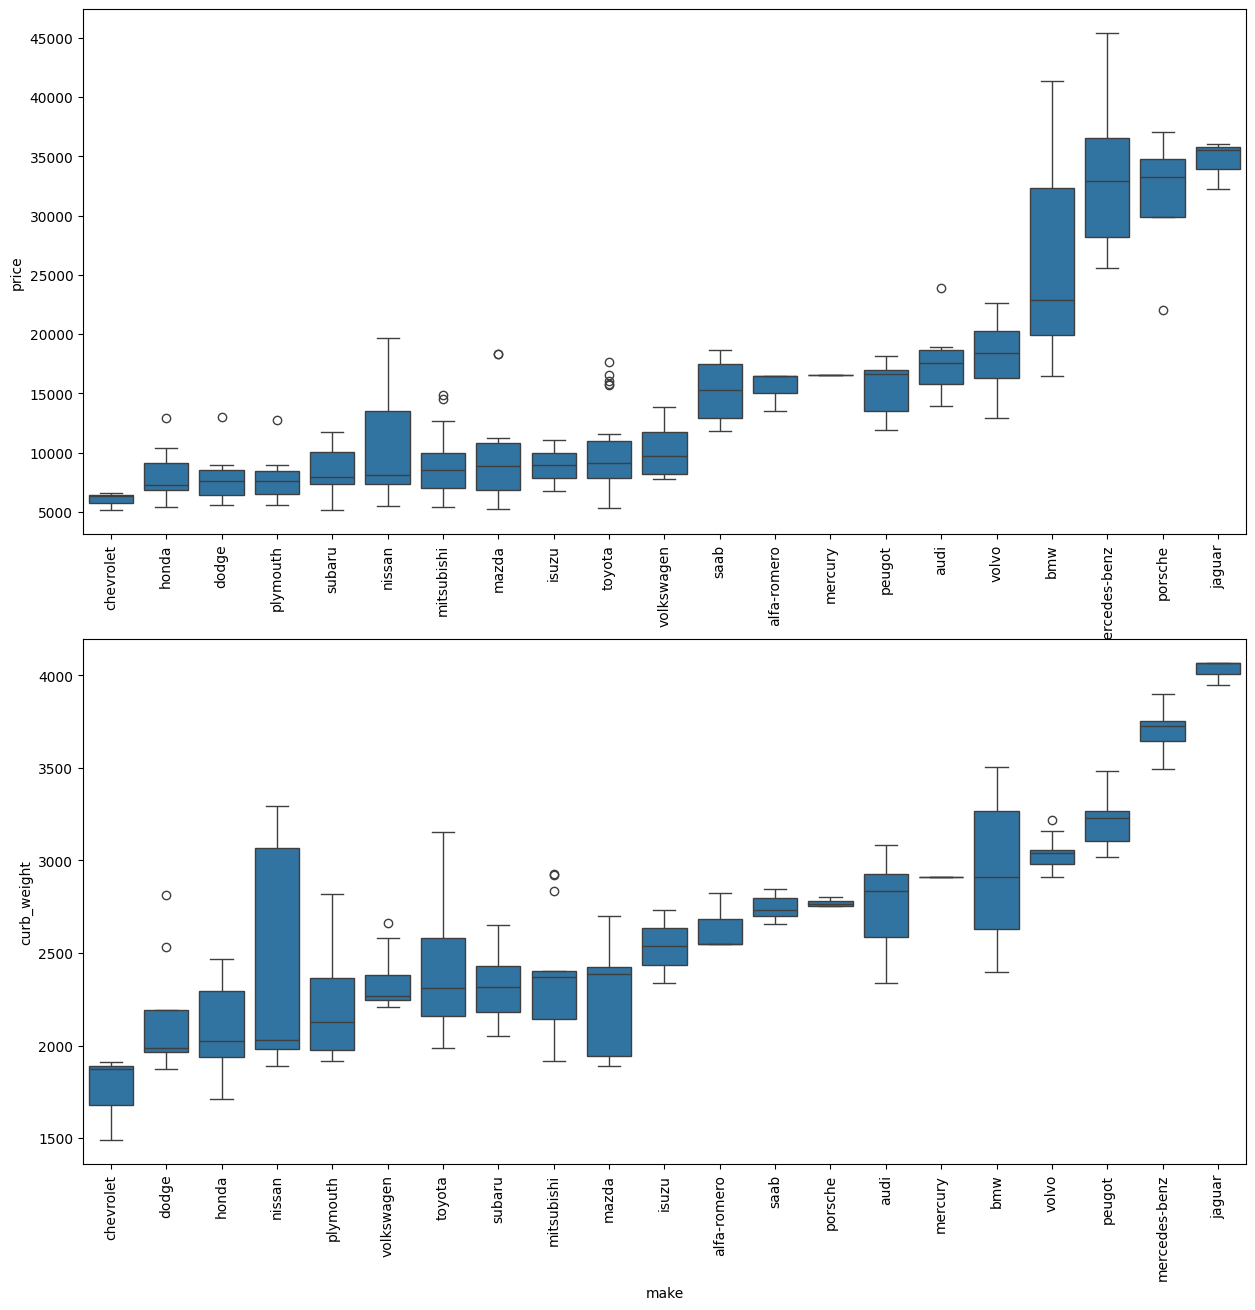

In [143]:
## Put your code below   
# med_price = auto_price[['make','price']].groupby('make').median('price').sort_values(by = 'price').reset_index()['make']
# med_weight = auto_price[['make','curb_weight']].groupby('make').median('curb_weight').sort_values(by = 'curb_weight').reset_index()['make']

fig, ax = plt.subplots(2, 1, figsize=(15,15))
sns.boxplot(x = 'make', y = 'price', data = auto_price, order = auto_price.groupby('make')['price'].median().sort_values().index, ax = ax[0])
sns.boxplot(x = 'make', y = 'curb_weight', data = auto_price, order = auto_price.groupby('make')['curb_weight'].median().sort_values().index, ax = ax[1])

plt.xticks(rotation = 90)
plt.sca(ax[0])
plt.xticks(rotation = 90)

plt.show()



> Provide short answers to the following questions:    
> 1. What do these two box plots show you that was difficult to perceive in the scatter plot? 
> 2. What information is lost when using ordered box plots?   

> **Answers:** 
> 1. It's much easier to tell the different makes apart.                 
> 2. It is now difficult to tell the relationship between price and curb_weight. I can solve this if i share the axes in both of the plots, this may make the relationship easier to see.

### Marker Shape

Marker shape is another commonly used plot aesthetic for displaying categorical relationships. As with qualitative color palettes, this aesthetic is only useful when two conditions are met:
1. The number of categories is small.
2. Distinctive shape are chosen for the markers.

The code in the cell below uses the `scatterplot` function from the Seaborn package to plot aspiration as a marker type and color (hue) for fuel type.     

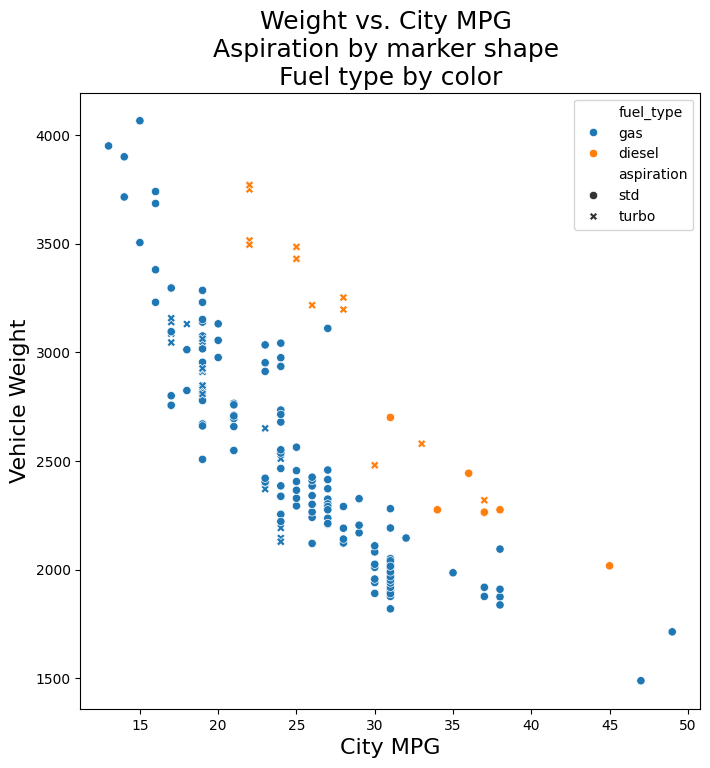

In [154]:
fig, ax = plt.subplots(figsize=(8, 8))
ax=sns.scatterplot(x = 'city_mpg', y = 'curb_weight', 
                      style = 'aspiration', 
                      hue = 'fuel_type', 
                      data=auto_price,
                      ax=ax)
_=ax.set_title('Weight vs. City MPG \nAspiration by marker shape \nFuel type by color', fontsize=18)
_=ax.set_xlabel('City MPG', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 
plt.show()

The resulting plot above takes a bit of study to see any useful relationship. Several relationships can be noticed:
1. For gas cars, it is clear that for the most part, only cars in the middle of the weight and fuel economy range have turbo aspiration. 
2. Most diesel cars have turbo aspiration, particularly the heavy cars. 

It is clear that without the color coding of the fuel type, these interpretations could not be found. This illustrates a key aspect of visualization for complex data. Very often **multiple plot attributes are needed to understand relationships**. 

> **Exercise 5-8:** Is it possible to project 5 dimensions of the auto data set onto the 2-dimensional plot surface? Create a scatter plot with curb weight on the vertical axis and price on the horizontal axis. Set the hue to fuel type, and the style to aspiration. Add engine size as marker size as an aesthetic. You will likely need to try different marker size ranges, assigning a tuple to the 'sizes' argument. Try to avoid too many over-plotted markers and use an alpha of 0.5. 

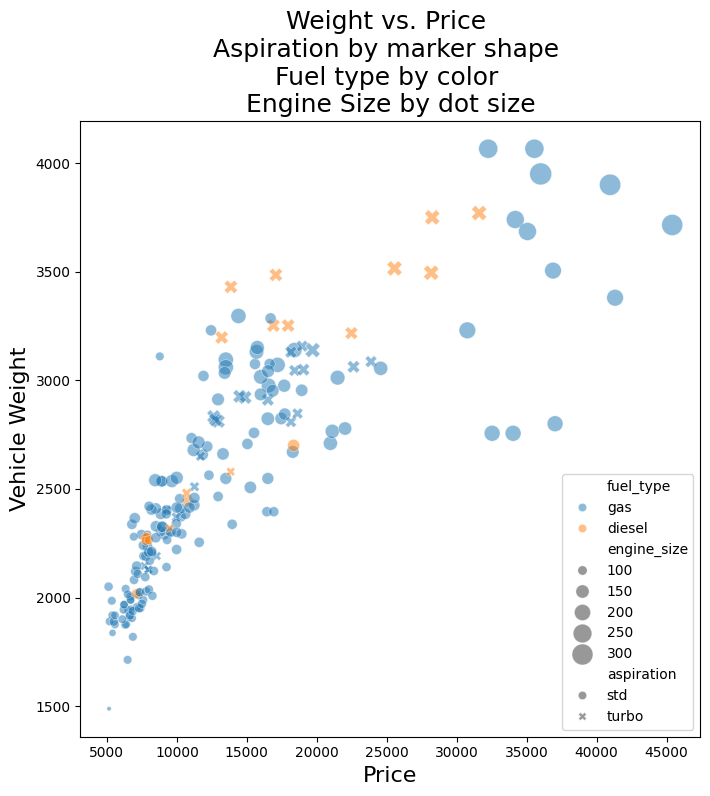

In [ ]:
## Put your code below
fig, ax = plt.subplots(figsize=(8, 8))
ax=sns.scatterplot(x = 'price', y = 'curb_weight', 
                      style = 'aspiration', 
                      hue = 'fuel_type', 
                      data=auto_price, 
                      size = 'engine_size', sizes = (10.0, 250.0),
                      alpha = 0.5,
                      ax=ax)
_=ax.set_title('Price vs. Weight \nAspiration by marker shape \nFuel type by color \nEngine Size by dot size', fontsize=18)
_=ax.set_xlabel('Price', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 
plt.show()


> Referring to Exercise 5-5, what new information can you see about the relationships between these variables from this visualization?   

> **Answer:** This adds a fifth dimension (removing MPG while adding fuel type and aspiration), it shows that the previous relationship established is true for both gas and diesel engines. (We lost the data on MPG). It also shows that diesel cars have more turbo aspiration at the higher end of price / weight, while gas cars with turbo are around the 20,000 price point and about 2500-3000 curb weight. We've gained information 


> **Exercise 5-9:** What happens when there are a large number of symbol shapes? To find out, create a scatter plot with price on the horizontal axis, vehicle weight on the vertical axis, and the `hue` argument set to fuel type. Set the `style` argument to the engine type. Leave marker size as the default. Use an alpha of 0.5.

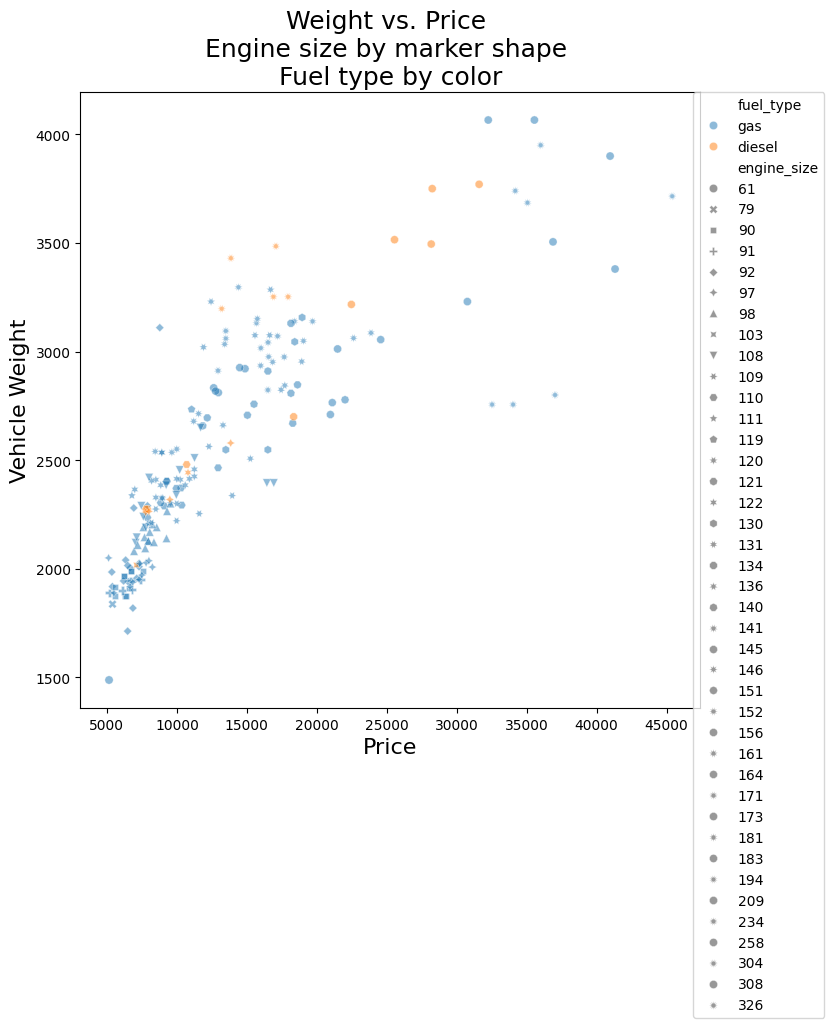

In [165]:
## Put your code below    
## Put your code below
fig, ax = plt.subplots(figsize=(8, 8))
ax=sns.scatterplot(x = 'price', y = 'curb_weight', 
                      style = 'engine_size', 
                      hue = 'fuel_type', 
                      data=auto_price, 
                    #   size = 'engine_size', sizes = (10.0, 250.0),
                      alpha = 0.5,
                      ax=ax)
_=ax.set_title('Weight vs. Price \nEngine size by marker shape \nFuel type by color', fontsize=18)
_=ax.set_xlabel('Price', fontsize=16)
_=ax.set_ylabel('Vehicle Weight', fontsize=16) 

ax.legend(bbox_to_anchor=(1.2,1), loc = 'upper right', borderaxespad=0.0)

plt.show()






> Can you find any useful pattern in the resulting plot? What does this tell you about using a large number of marker shapes and why? 

> **Answer:**    We can still see the general relationship between price and weight, true for both fuel types. But we don't gain any information from engine size because there are too many markers, and they are difficult to tell apart. For example, trying to pick apart the markers for engine size 110, we can't at-a-glance see where they all are in the plot.

## Transformation of Variables

So far, we have only been working with the variables as they appear in the original dataset. It is often quite useful to examine a number of possible transformations of some of the variables in a dataset to better understand the relationship. There are many functions one can choose from leading to a great many possible transformations. As a result of the number of possible choices, this process is time-consuming. However, the insight grained can often be worth the effort.    

In this section, we will use a running example to better understand the relationship between auto price and weight. Our goal is to find transformations of these variables that provide a nearly linear relationship. Why linear? Our perception of relationships along straight lines is often quite good.      

### Initial exploration  

Adding regression lines is often a good place to start when exploring the functional relationship between two variables. Again, there are a great many choices. In this case we will start by adding a second-order polynomial regression line to a plot.   

We will use the [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) function. The lmplot function can use either lowess, nonlinear local regression, or polynomial regress to fit a curve to data. In this case we will used a polynomial regression line of a specified order to fit the data. The function computes and displays the 95% confidence intervals for the regression line. These confidence intervals can help when assessing model fit to the data. We will explore bootstrap resampled models in detail later. Unfortunately, Seaborn currently does not support bootstrap resampling for lowess models.     

If you examine the documentation for lmplot, you will see that it does not use a Matplotlib axis. Rather, the function returns a seaborn [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object. We will have much more to say about using FacetGrids in the next chapter.   

Now, execute the code in the cell below and examine the result.

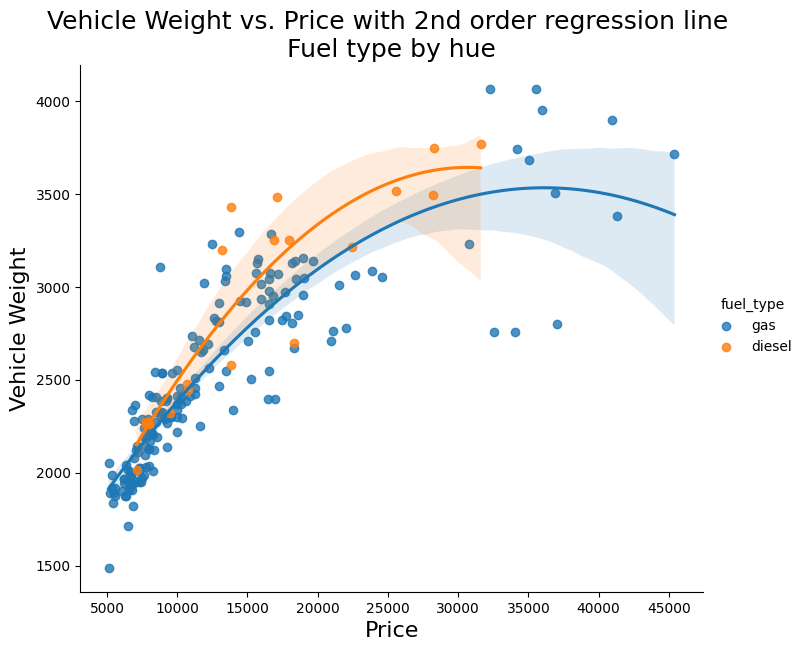

In [166]:
g = sns.lmplot(x = 'price', y = 'curb_weight', 
                      hue = 'fuel_type',
                      order=2,
                      aspect=1.2,
                      height=6,
                      data=auto_price)
plt.title('Vehicle Weight vs. Price with 2nd order regression line \nFuel type by hue', fontsize=18);
plt.xlabel('Price', fontsize=16);
plt.ylabel('Vehicle Weight', fontsize=16); 

You can see that the relationship between price and vehicle weight is far from linear. 

### Distribution of the variables     

Nonlinear relationships are inevitably related to the probability distribution of the variables. The code in the cell below plots the kernel density estimation (KDE) plot for the two variables we are focused on. Execute this code and examine the results.  

Text(0.5, 1.0, 'Density of vehicle weight')

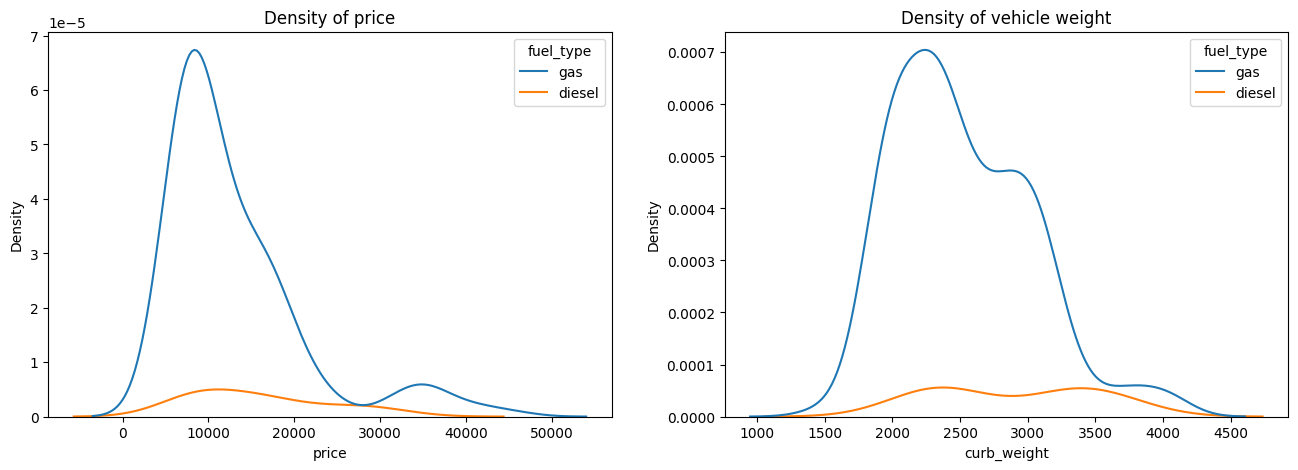

In [167]:
fig, ax = plt.subplots(1,2,figsize=(16, 5))
ax[0]=sns.kdeplot(x = 'price', 
                      hue = 'fuel_type',
                      data=auto_price,
                      ax=ax[0])
ax[0].set_title('Density of price')
ax[1]=sns.kdeplot(x = 'curb_weight', 
                      hue = 'fuel_type',
                      data=auto_price,
                      ax=ax[1])
ax[1].set_title('Density of vehicle weight')

Auto price has significant right skew for both gas and diesel. The distribution of the vehicle weight is less skewed. These observations indicate that transforming the price variable will be the better approach.    

### Log transformations   

A logarithmic transformation is often a good approach if a variable exhibits the following characteristics:      
1. A significant right skew.  
2. Only positive values.   

Many real-world variables, such as price, weight, and temperature, exhibit these characteristics.  

As an initial test of the log transformation, the code in the cell below creates KDE plots of both the variables of interest on a log scale. The Matplotlib `set` method is used to create the density plots with a logarithmic horizontal scale. Execute this code and examine the results.     

Text(0.5, 0, 'Log vehicle weight')

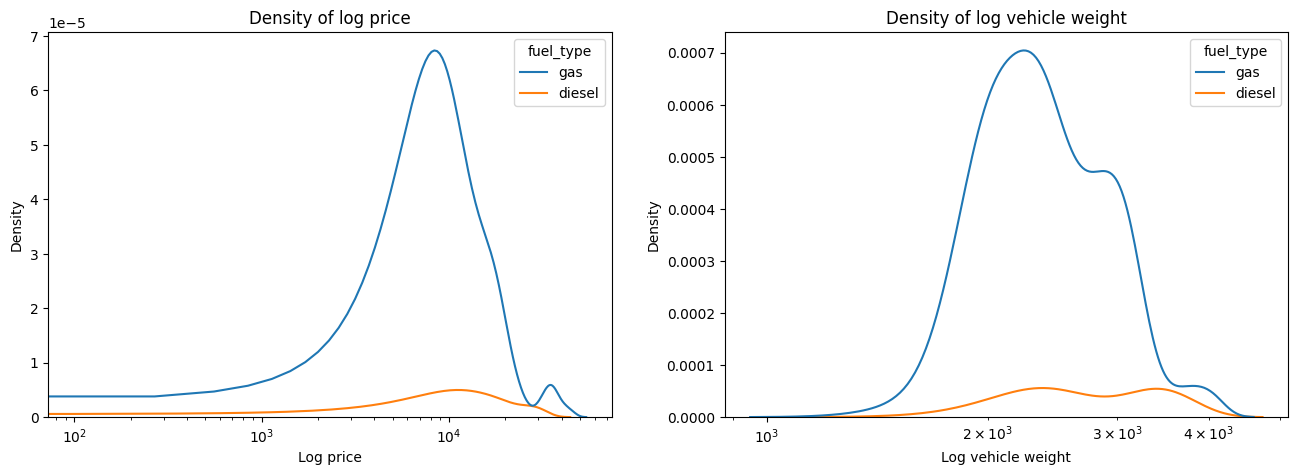

In [168]:
fig, ax = plt.subplots(1,2,figsize=(16, 5))
ax[0]=sns.kdeplot(x = 'price', 
                      hue='fuel_type',
                      data=auto_price,
                      ax=ax[0])
ax[0].set(xscale="log")
ax[0].set_title('Density of log price')
ax[0].set_xlabel('Log price')
ax[1]=sns.kdeplot(x = 'curb_weight', 
                      hue = 'fuel_type',
                      data=auto_price,
                      ax=ax[1])
ax[1].set(xscale="log")
ax[1].set_title('Density of log vehicle weight')
ax[1].set_xlabel('Log vehicle weight')

Examine the shape of these distributions. The distribution of log prices is left-skewed, particularly for the gasoline cars. But, this left tail is thin. Whereas, the shape of the distribution of the less skewed variable, vehicle weight, has changed less, but is a bit more symmetric. 

> **Exercise 5-10:** To further test the effectiveness of the logarithmic transformation you will now do the following:    
> 1. Create a set of plot axes for a 1 by 2 plot array.   
> 2. Reproduce the plot from Exercise 5.8, with correct axis labels and title, and the following differences:      
>     - On the first set of axis set the x-axis scale, for price, to logarithmic, with vehicle weight (`curb_weight`) on the vertical axis.  
>     - On the second set of axis set the y-axis scale, for vehicle weight, to logarithmic, and the x-axis scale, for price, to logarithmic.   
> Execute your code.   

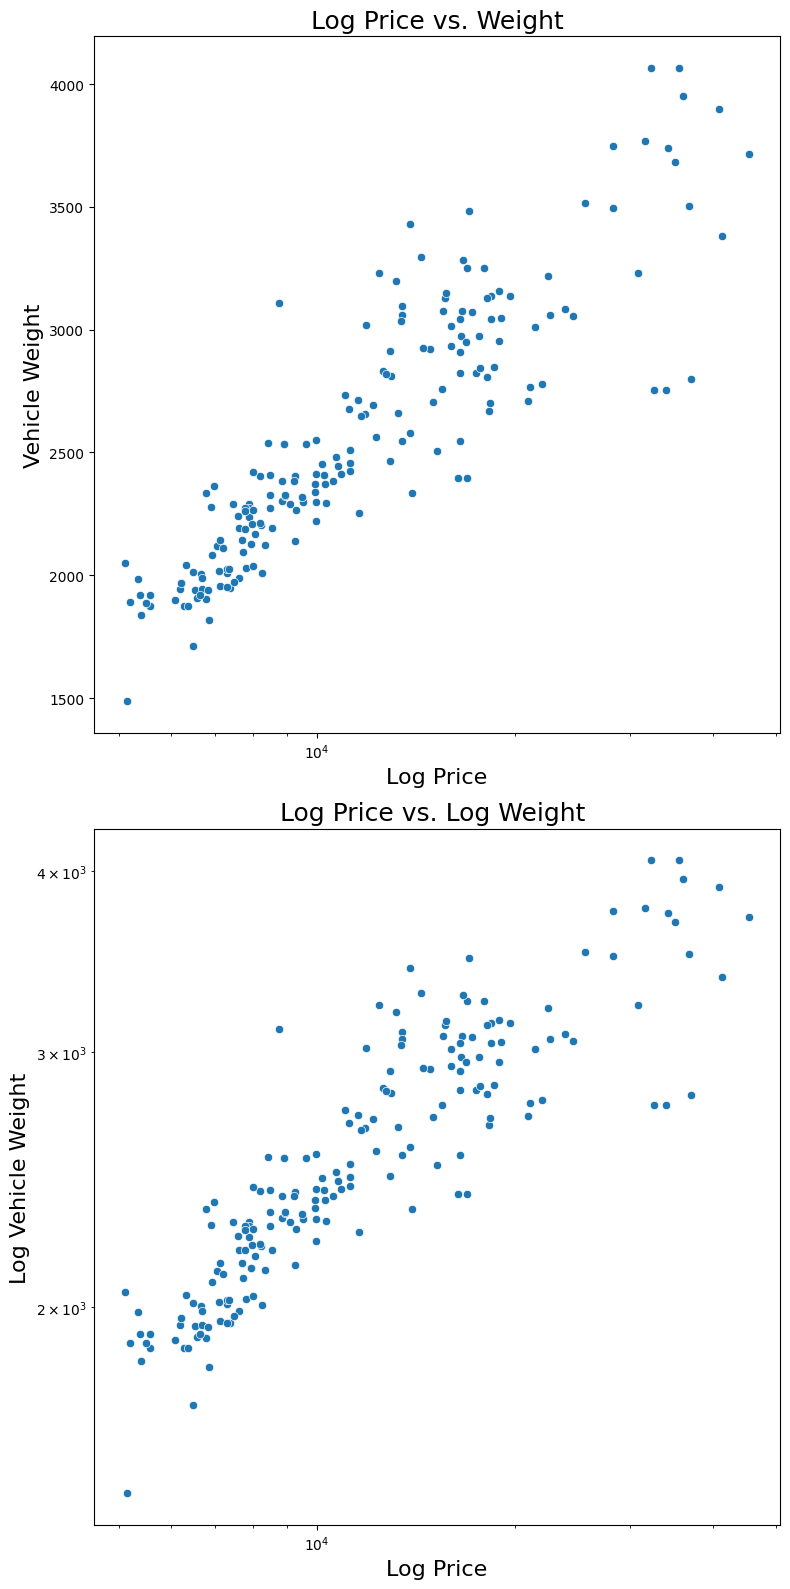

In [233]:
## Put your code below   

fig, ax = plt.subplots(2, 1, figsize=(8, 16))

# log price, no scaling on curb weight
sns.scatterplot(x = 'price', y = 'curb_weight', 
                      data=auto_price, 
                    #   style = 'aspiration', 
                    #   hue = 'fuel_type', 
                    #   size = 'engine_size', sizes = (10.0, 250.0),
                      ax=ax[0])
ax[0].set_title('Log Price vs. Weight', fontsize=18)
ax[0].set_xlabel('Log Price', fontsize=16)
ax[0].set_ylabel('Vehicle Weight', fontsize=16) 
ax[0].set_xscale('log')

sns.scatterplot(x = 'price', y = 'curb_weight', 
                      data=auto_price, 
                    #   style = 'aspiration', 
                    #   hue = 'fuel_type', 
                    #   size = 'engine_size', sizes = (10.0, 250.0),
                      ax=ax[1])
ax[1].set_title('Log Price vs. Log Weight ', fontsize=18)
ax[1].set_xlabel('Log Price', fontsize=16)
ax[1].set_ylabel('Log Vehicle Weight', fontsize=16) 
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()





> Examine your results and answer the following questions:      
> 1. Which pairing of logarithmic transformed or untransformed variables produced a more linear relationship with the other variable and why?  Hint, These relationships are fairly similar, but one results in less dispersion of the values around an imaginary straight line.      
> 2. Is the change in shape of the distributions of the two variables between the original and transformed consistent with the results you observed for question 1?    

> **Answers:**    
> 1. My guess is: Log price vs vehicle weight produced a more linear relationship. Car prices aren't linear, because there are some high end vehicles that cost several times more (outliers). Vehicle weight is more linear, because there's no reason to add unnecessary weight to a vehicle. Driving an extremely heavy car is not a status symbol. However, looking below, they show the same correlation, with log price vs log weight being slightly higher. 

However, if we restrict to one fuel type , not losing the information on types of cars, there is a slightly more linear relationship for gas cars using log price against weight. The same is true in reverse for diesel cars.


> 2. First, we know that weight and MPG are highly negatively correlated. The first result showed a second order polymonial relationship between price and MPG, meaning lower MPG had x^2 returns on price. This is consistent, with price changing at a faster rate than vehicle weight - higher weight means increasing CHANGE in price. A polymonial relationship is not the same as an exponential one, but the increasing delta (>0 first derivative) is the same relationship in q1 and q10.

In [197]:
## investigating correlation of log price w/ curb weight and log curb weight

log_price = np.log10(auto_price['price'])
log_curb_weight = np.log10(auto_price['curb_weight'])
curb_weight = auto_price['curb_weight']
price = auto_price['price']

corr0 = np.corrcoef(auto_price['price'], auto_price['curb_weight'])[0,1]
corr1 = np.corrcoef(log_price, auto_price['curb_weight'])[0,1]
corr2 = np.corrcoef(log_price, log_curb_weight)[0,1]

print(f"Correlation price vs curb_weight: {corr0: .4f}")
print(f"Correlation log(price) vs curb_weight: {corr1:.4f}")
print(f"Correlation log(price) vs log(curb_weight): {corr2:.4f}")

## proving that city mpg and vehicle weight are highly negatively correlated
corrMPG = np.corrcoef(auto_price['city_mpg'], auto_price['curb_weight'])[0,1]
print(f"Correlation City MPG vs weight: {corrMPG:.4f}")


Correlation price vs curb_weight:  0.8357
Correlation log(price) vs curb_weight: 0.8947
Correlation log(price) vs log(curb_weight): 0.8950
Correlation City MPG vs weight: -0.7722


In [238]:
## investigating correlation of log price w/ curb weight and log curb weight, restricting on gas type

fvar = 'diesel'

# log_price = np.log10(auto_price[auto_price['fuel_type'] ==  fvar]['price'])
log_curb_weight = np.log10(auto_price[auto_price['fuel_type'] == fvar]['curb_weight'])
curb_weight = auto_price[auto_price['fuel_type'] == fvar]['curb_weight']
price = auto_price[auto_price['fuel_type'] == fvar]['price']

corr0 = np.corrcoef(price, curb_weight)[0,1]
corr1 = np.corrcoef(log_price, curb_weight)[0,1]
corr2 = np.corrcoef(log_price, log_curb_weight)[0,1]

# print(f"Correlation price vs curb_weight: {corr0: .4f}")
print(f"Correlation log(price) vs curb_weight: {corr1:.4f}")
print(f"Correlation log(price) vs log(curb_weight): {corr2:.4f}")


Correlation log(price) vs curb_weight: 0.9122
Correlation log(price) vs log(curb_weight): 0.9137


### Power Transformations     

Another possible method of transforming data is to apply a power transformation. The power transform simply raises the values, $v$, of a variable by a power. The power is expressed as the logarithm, $\lambda$. Several algorithms have been developed to find values of $\lambda$ for power transformation. These algorithms attempt to find $\lambda\text{s}$ that transform the variable to the closest fit to a Normal distribution. The resulting transformation is considered optimal since the relationship between Normally distributed variables tends to be linear.  

One such transformation is the Box-Cox transform. The Box-Cox algorithm uses logarithmic transformations and is there for suitable variables with values greater than 0. The [sklearn.preprocessing.PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) function implements both the Box-Cox transformation and the Yeo-Johnson algorithm. 

The Box-Cox algorithm is defined by the following relations:   
$$
x^{(\lambda)}_i = 
\begin{cases}
      \frac{x^{\lambda}_i - 1}{\lambda},\ if\ \lambda \ne 0 \\
      ln(x_i),\ if\ \lambda = 0
\end{cases}  
$$

Note that in this formulation $\lambda=0$ is the logarithm since $log(1) = 0$. Any values $0 \gt \lambda \lt 1$ are roots of the values $x$. For example, for square root, we get $\lambda = log(0.5) = -0.69$.  For values $1 \lt \lambda \lt \infty$ the variable is raised to a power. If $\lambda$ is negtive the transform is by an inverse power. As another example, if the power is squared, then $\lambda = log(2.0) = 0.69$, the same absolute value of $\lambda$ with the opposite sign.  

The code in the cell below finds and displays an optimal value of $\lambda$. Execute this code and examine the result.  

In [244]:
pt = PowerTransformer(method='box-cox')
pt.fit(np.array(auto_price['price']).reshape(-1, 1))
print(pt.lambdas_)

[-0.63558829]


The optimal value of $\lambda$ is just slightly less than an inverse square root. 

> **Exercise 5-11:** You will now apply the power transformation to the price variable and display the results. Do the following:   
> 1. Use the `transform` method of the PowerTransformer object created above to create a transformed variable column in the data frame. Name this column `power_price`. You will need to apply the Numpy `reshape(-1, 1)` to the price column of the data frame to get an array of the dimensions Scikit-Learn expects.     
> 2. Create a set of plot axes for a 1 by 2 plot array.     
> 3. For the first axes set, create a plot similar to the one created in Exercise 5-8. Show log of vehicle weight on the vertical axis and transformed price on the horizontal axis. Make sure you have the correct axis labels and title on your plot.  
> 4. For the second axes set, display KDE plots of the transformed price variable using the fuel type as the hue argument.        
> Execute your code.    

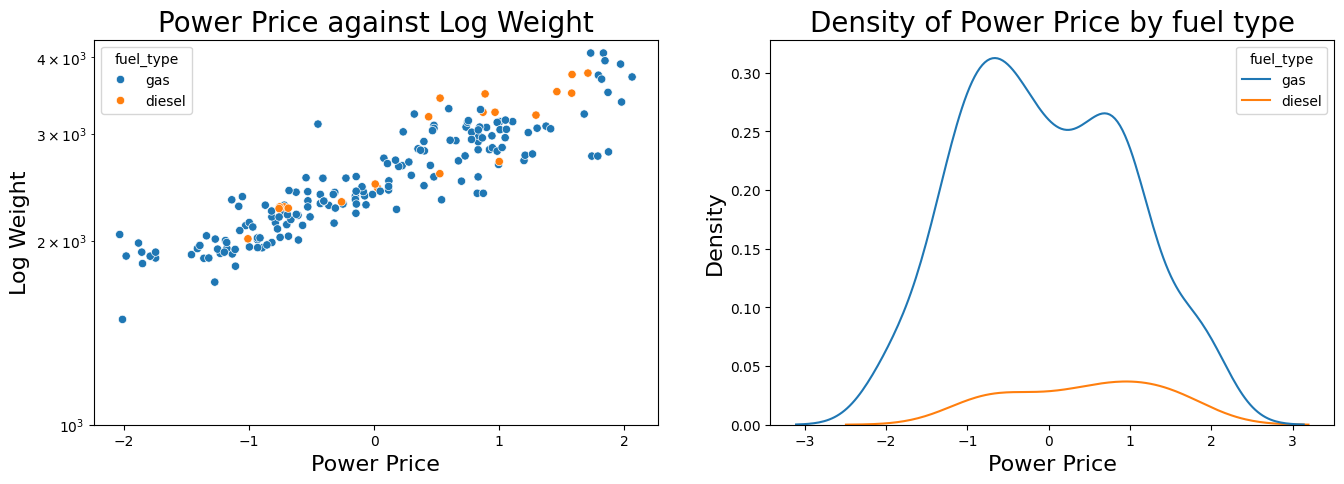

In [ ]:
## Put your code below   
power_price = pt.transform(auto_price['price'].values.reshape(-1,1)).flatten() # needs 2d array, but we only have one column
auto_price['power_price'] = power_price

fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.scatterplot(x = 'power_price', y = 'curb_weight',
                hue = 'fuel_type',    
                data = auto_price, 
                ax = ax[0])

ax[0].set_title('Power transformed price against Log Weight', fontsize = 20)
ax[0].set_yscale('log')
ax[0].set_xlabel('Power transformed price', fontsize = 16)
ax[0].set_ylabel('Log Weight', fontsize = 16)
ax[0].set_ylim(bottom = 1000)

sns.kdeplot(x = 'power_price', hue = 'fuel_type',
            data = auto_price, 
            ax = ax[1])
ax[1].set_title('Density of power transformed price by fuel type', fontsize = 20)
ax[1].set_xlabel('Power transformed price', fontsize = 16)
ax[1].set_ylabel('Density', fontsize = 16)
plt.show()


In [252]:
auto_price['price'].min()
auto_price[(auto_price['price'] == 45400) | (auto_price['price'] == 5118)]

,Unnamed: 0,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,power_price
67,74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400,2.063350
128,138,2,83,subaru,gas,std,two,hatchback,fwd,front,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118,-2.034566


> Examine the plots you have created and answer these questions:     
> 1. Does the relationship between between log of vehicle weight and the transformed price appear reasonably linear?   
> 2. For the gas cars which price range(s) have vehicles with weight that are generally not consistent with a linear relationship with transformed price?    
> 3. Is the shape of the distribution of price for both gas and diesel cars reasonably symmetric?    

> **Answers:**     
> 1. Yes, reasonably so, although I still believe that car weight appears more uniformly distributed, while car price is skewed right, with lots of high priced luxury cars. In this case, the log scale of weight has most of our cars in a relatively small band, so the "shape" of the log isn't fully displayed.
> 2. low and high priced gas cars have have outliers, low priced cars that are heavier and high priced cars that are lighter than expected - likely luxury sports cars.    
> 3. the data is reasonably symmetric with no long tails, after transformation. Relatively though, diesel cars are more expensive than gas cars.

As a further check on the power transformation of the price variable, we will display a plot of the transformed variable vs. log vehicle weight. We will include second-order bootstrap regression lines for both gas and diesel cars. Execute the code in the cell below to display this plot.   

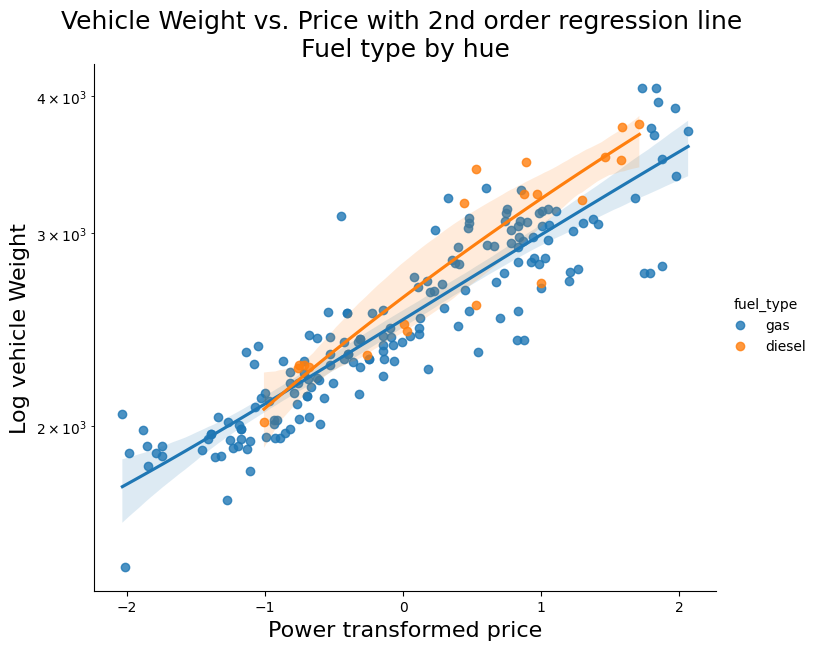

In [253]:
g = sns.lmplot(x = 'power_price', y = 'curb_weight', 
                      hue = 'fuel_type',
                      order=2,
                      aspect=1.2,
                      height=6,
                      data=auto_price)
plt.yscale("log")
plt.title('Vehicle Weight vs. Price with 2nd order regression line \nFuel type by hue', fontsize=18);
plt.xlabel('Power transformed price', fontsize=16);
plt.ylabel('Log vehicle Weight', fontsize=16); 

Comparing the plot above to the equivalent plot for the original variables, one can see quite a difference. The relationship between the log vehicle weight and the power transformed price is close to linear for both gas and diesel cars. Further, the bootstrap confidence intervals are much narrower than for the original variables.  

So you might well ask, what have we really achieved here? Could one have not simply fit some kind of non-linear model to these data and made predictions from it?   

To answer these questions, one must focus on our goal of exploring the data and to providing insight into the relationships between the variables. This goal is not identical to creating a predictive model, but will be helpful if that is the next step in our process. Having found a simple and intuitive relationship between two important variables is a significant step toward this goal. Not only have we gained some insight into this relationship, but we would now be in a good position to explain this relationship to others so they will have similar insights.     

## Summary

In this chapter, we explored the following key points:       
- Proper use of plot aesthetics enables the projection of multiple dimensions of complex data onto the 2-dimensional plot surface.     
- All plot aesthetics have limitations which must be understood to use them effectively.     
- The effectiveness of a plot aesthetic varies with the type and the application.   
- Using transformations to improve perception of relationships between variables.  

#### Copyright 2020, 2021, 2022, 2023, 2024 Stephen F Elston. All rights reserved.       

## Bibliography     




.